In [ ]:
import pandas as pd
import numpy as np
import math

def find_entropy(data):
    entropy = 0
    for value in data.unique():
        x = (data == value).sum() / len(data)
        entropy += (- x * math.log(x, 2))
    return round(entropy, 3)

def information_gain(data, data_):
    info = 0
    for value in data_.unique():
        df = data[data_ == value]
        w_avg = len(df) / len(data)
        entropy = find_entropy(df['play'])
        x = w_avg * entropy
        info += x
    ig = find_entropy(data['play']) - info
    return round(ig, 3)

def entropy_and_infogain(datax, feature):
    for value in datax[feature].unique():
        df = datax[datax[feature] == value]
        if len(df) < 1:
            continue
        print(f'Entropy of {feature} - {value} = {find_entropy(df["play"])}')
    print(f'Information Gain for {feature} = {information_gain(datax, datax[feature])}')

# data = pd.DataFrame({
#     'outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
#     'temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
#     'humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
#     'wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
#     'play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
# })

data = pd.read_csv('PlayTennis.csv')

print(f'Entropy of the entire dataset: {find_entropy(data["play"])}')

entropy_and_infogain(data, 'outlook')

entropy_and_infogain(data, 'temp')

entropy_and_infogain(data, 'humidity')

class Node:
    def __init__(self, feature=None, entropy=None, info_gain=None, value=None):
        self.feature = feature
        self.entropy = entropy
        self.info_gain = info_gain
        self.value = value
        self.children = {}

def build_tree(data, features):
    root = Node()

    if len(data['play'].unique()) == 1:
        root.value = data['play'].iloc[0]
        return root

    if len(features) == 0:
        root.value = data['play'].value_counts().idxmax()
        return root

    root.entropy = find_entropy(data['play'])

    max_info_gain = -1
    best_feature = None
    for feature in features:
        ig = information_gain(data, data[feature])
        if ig > max_info_gain:
            max_info_gain = ig
            best_feature = feature

    root.info_gain = max_info_gain
    root.feature = best_feature

    for value in data[best_feature].unique():
        child_data = data[data[best_feature] == value]
        root.children[value] = build_tree(child_data, [f for f in features if f != best_feature])

    return root

root = build_tree(data, ['outlook', 'temp', 'humidity', 'wind'])

def print_tree(node, indent=''):
    if node.value is not None:
        print(indent + "Leaf:", node.value)
    else:
        print(indent + "Feature:", node.feature)
        print(indent + "Entropy:", node.entropy)
        print(indent + "Information Gain:", node.info_gain)
        for value, child_node in node.children.items():
            print(indent + "Value:", value)
            print_tree(child_node, indent + "  ")
print_tree(root)

def predict(node, sample):
    while node.value is None:
        feature_value = sample[node.feature]
        if feature_value not in node.children:
            return node.children[list(node.children.keys())[0]].value
        node = node.children[feature_value]
    return node.value

sample = {'outlook': 'Sunny', 'temp': 'Hot', 'humidity': 'High', 'wind': 'Weak'}
prediction = predict(root, sample)
print("\nPrediction for Playing Tennis:", prediction)


Entropy of the entire dataset: 0.94
Entropy of outlook - Sunny = 0.971
Entropy of outlook - Overcast = 0.0
Entropy of outlook - Rain = 0.971
Information Gain for outlook = 0.246
Entropy of temp - Hot = 1.0
Entropy of temp - Mild = 0.918
Entropy of temp - Cool = 0.811
Information Gain for temp = 0.029
Entropy of humidity - High = 0.985
Entropy of humidity - Normal = 0.592
Information Gain for humidity = 0.151
Feature: outlook
Entropy: 0.94
Information Gain: 0.246
Value: Sunny
  Feature: humidity
  Entropy: 0.971
  Information Gain: 0.971
  Value: High
    Leaf: No
  Value: Normal
    Leaf: Yes
Value: Overcast
  Leaf: Yes
Value: Rain
  Feature: wind
  Entropy: 0.971
  Information Gain: 0.971
  Value: Weak
    Leaf: Yes
  Value: Strong
    Leaf: No

Prediction for Playing Tennis: No


In [ ]:
sample = {'outlook': 'Sunny', 'temp': 'Hot', 'humidity': 'Normal', 'wind': 'Weak'}
prediction = predict(root, sample)
print("\nPrediction for Playing Tennis:", prediction)


Prediction for Playing Tennis: Yes


## Using Library

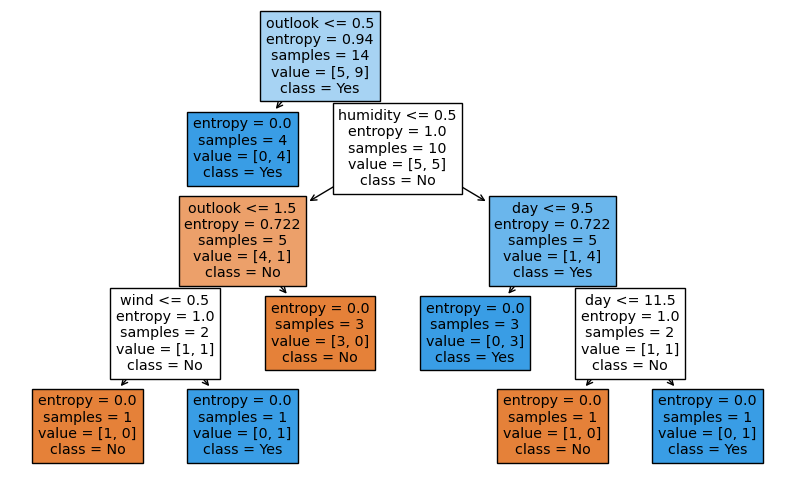

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset from CSV file
data = pd.read_csv('PlayTennis.csv')

le = preprocessing.LabelEncoder()
data_encoded = data.apply(le.fit_transform)

X = data_encoded.drop('play', axis=1)
y = data_encoded['play']

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
